<a href="https://colab.research.google.com/github/rajkachhadiya123/heart_failure_prediction/blob/main/heart_failure_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations

from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import StandardScaler #for standardization

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import ConfusionMatrixDisplay # import ConfusionMatrixDisplay instead of plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df_eda = pd.DataFrame()
df_eda = df.copy()
df_eda.head() # to print first few rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df_eda["anaemia"] = pd.to_numeric(df_eda["anaemia"]) # for float value
df_eda["diabetes"] = pd.to_numeric(df_eda["diabetes"])
df_eda["high_blood_pressure"] = pd.to_numeric(df_eda["high_blood_pressure"])
df_eda["smoking"] = pd.to_numeric(df_eda["smoking"])
df_eda["sex"] = pd.to_numeric(df_eda["sex"])
df_eda["DEATH_EVENT"] = pd.to_numeric(df_eda["DEATH_EVENT"])

In [6]:
df_eda["anaemia"] = df_eda["anaemia"].map(lambda x: "Yes" if x == 1 else "No")
df_eda["diabetes"] = df_eda["diabetes"].map(lambda x: "Yes" if x == 1 else "No")
df_eda["high_blood_pressure"] = df_eda["high_blood_pressure"].map(lambda x: "Yes" if x == 1 else "No")
df_eda["smoking"] = df_eda["smoking"].map(lambda x: "Yes" if x == 1 else "No")
df_eda["sex"] = df_eda["sex"].map(lambda x: "Male" if x == 1 else "Female")
df_eda["DEATH_EVENT"] = df_eda["DEATH_EVENT"].map(lambda x: "Yes" if x == 1 else "No")
df_eda.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Male,No,4,Yes
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Male,No,6,Yes
2,65.0,No,146,No,20,No,162000.00,1.3,129,Male,Yes,7,Yes
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Male,No,7,Yes
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Female,No,8,Yes


In [7]:
df_eda.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [8]:
df.isnull().any()


,0
age,False
anaemia,False
creatinine_phosphokinase,False
diabetes,False
ejection_fraction,False
high_blood_pressure,False
platelets,False
serum_creatinine,False
serum_sodium,False
sex,False


In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

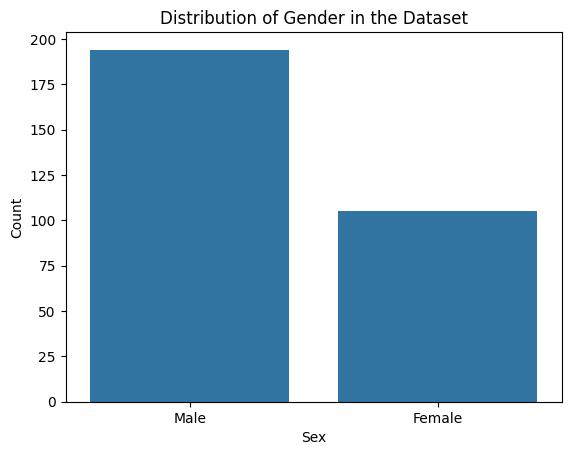

In [11]:
sns.barplot(x=df_eda['sex'].value_counts().index, y=df_eda['sex'].value_counts().values)
plt.title('Distribution of Gender in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

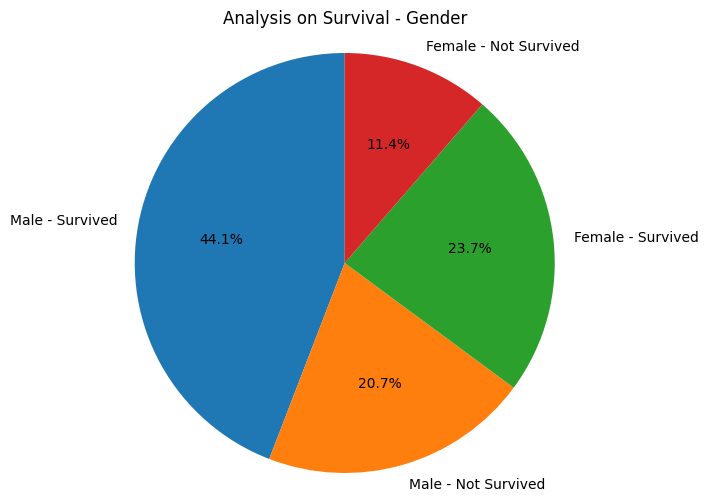

In [13]:
# Assuming df_eda contains only the necessary columns: 'sex' and 'DEATH_COUNT'
male_survived = df_eda[(df_eda["sex"] == 'Male') & (df_eda["DEATH_EVENT"] == 'No')].shape[0]
male_not_survived = df_eda[(df_eda["sex"] == 'Male') & (df_eda["DEATH_EVENT"] == 'Yes')].shape[0]
female_survived = df_eda[(df_eda["sex"] == 'Female') & (df_eda["DEATH_EVENT"] == 'No')].shape[0]
female_not_survived = df_eda[(df_eda["sex"] == 'Female') & (df_eda["DEATH_EVENT"] == 'Yes')].shape[0]

# Prepare data for the pie chart
labels = ['Male - Survived', 'Male - Not Survived', 'Female - Survived', 'Female - Not Survived']
values = [male_survived, male_not_survived, female_survived, female_not_survived]

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Analysis on Survival - Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

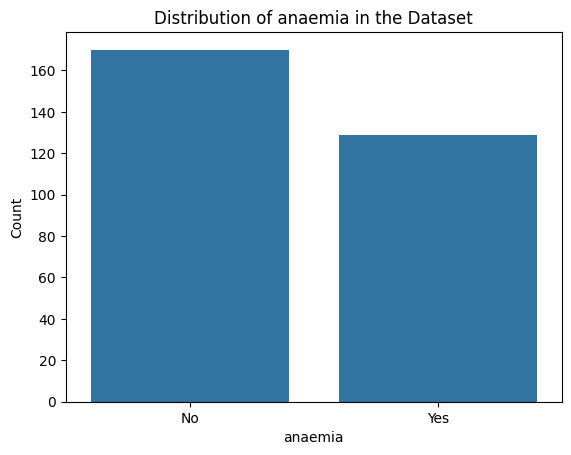

In [14]:
sns.barplot(x=df_eda['anaemia'].value_counts().index, y=df_eda['anaemia'].value_counts().values)
plt.title('Distribution of anaemia in the Dataset')
plt.xlabel('anaemia')
plt.ylabel('Count')
plt.show()

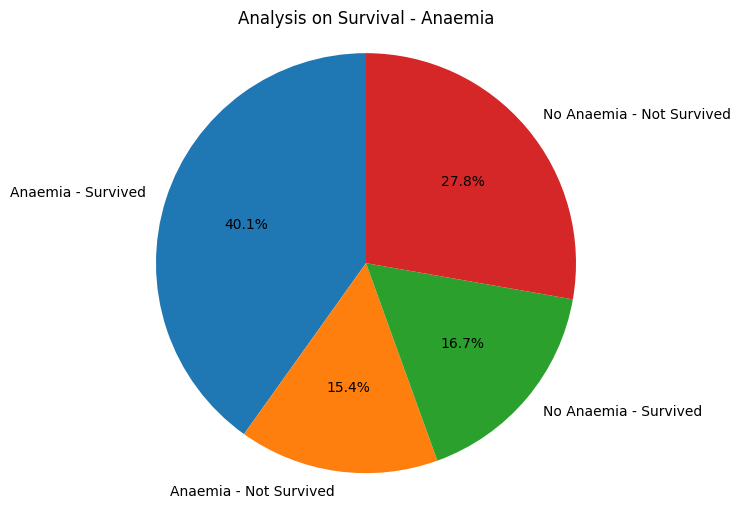

In [15]:
anemia_survived = df_eda[(df_eda["anaemia"] == 'No') & (df_eda["DEATH_EVENT"] == 'No')].shape[0]
anemia_not_survived = df_eda[(df_eda["anaemia"] == 'Yes') & (df_eda["DEATH_EVENT"] == 'Yes')].shape[0]
no_anemia_survived = df_eda[(df_eda["anaemia"] == 'No') & (df_eda["DEATH_EVENT"] == 'Yes')].shape[0]
no_anemia_not_survived = df_eda[(df_eda["anaemia"] == 'Yes') & (df_eda["DEATH_EVENT"] == 'No')].shape[0]

# Prepare data for the pie chart
labels = ['Anaemia - Survived', 'Anaemia - Not Survived', 'No Anaemia - Survived', 'No Anaemia - Not Survived']
values = [anemia_survived, anemia_not_survived, no_anemia_survived, no_anemia_not_survived]

# Plotting with Matplotlib
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Analysis on Survival - Anaemia')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Axes: >

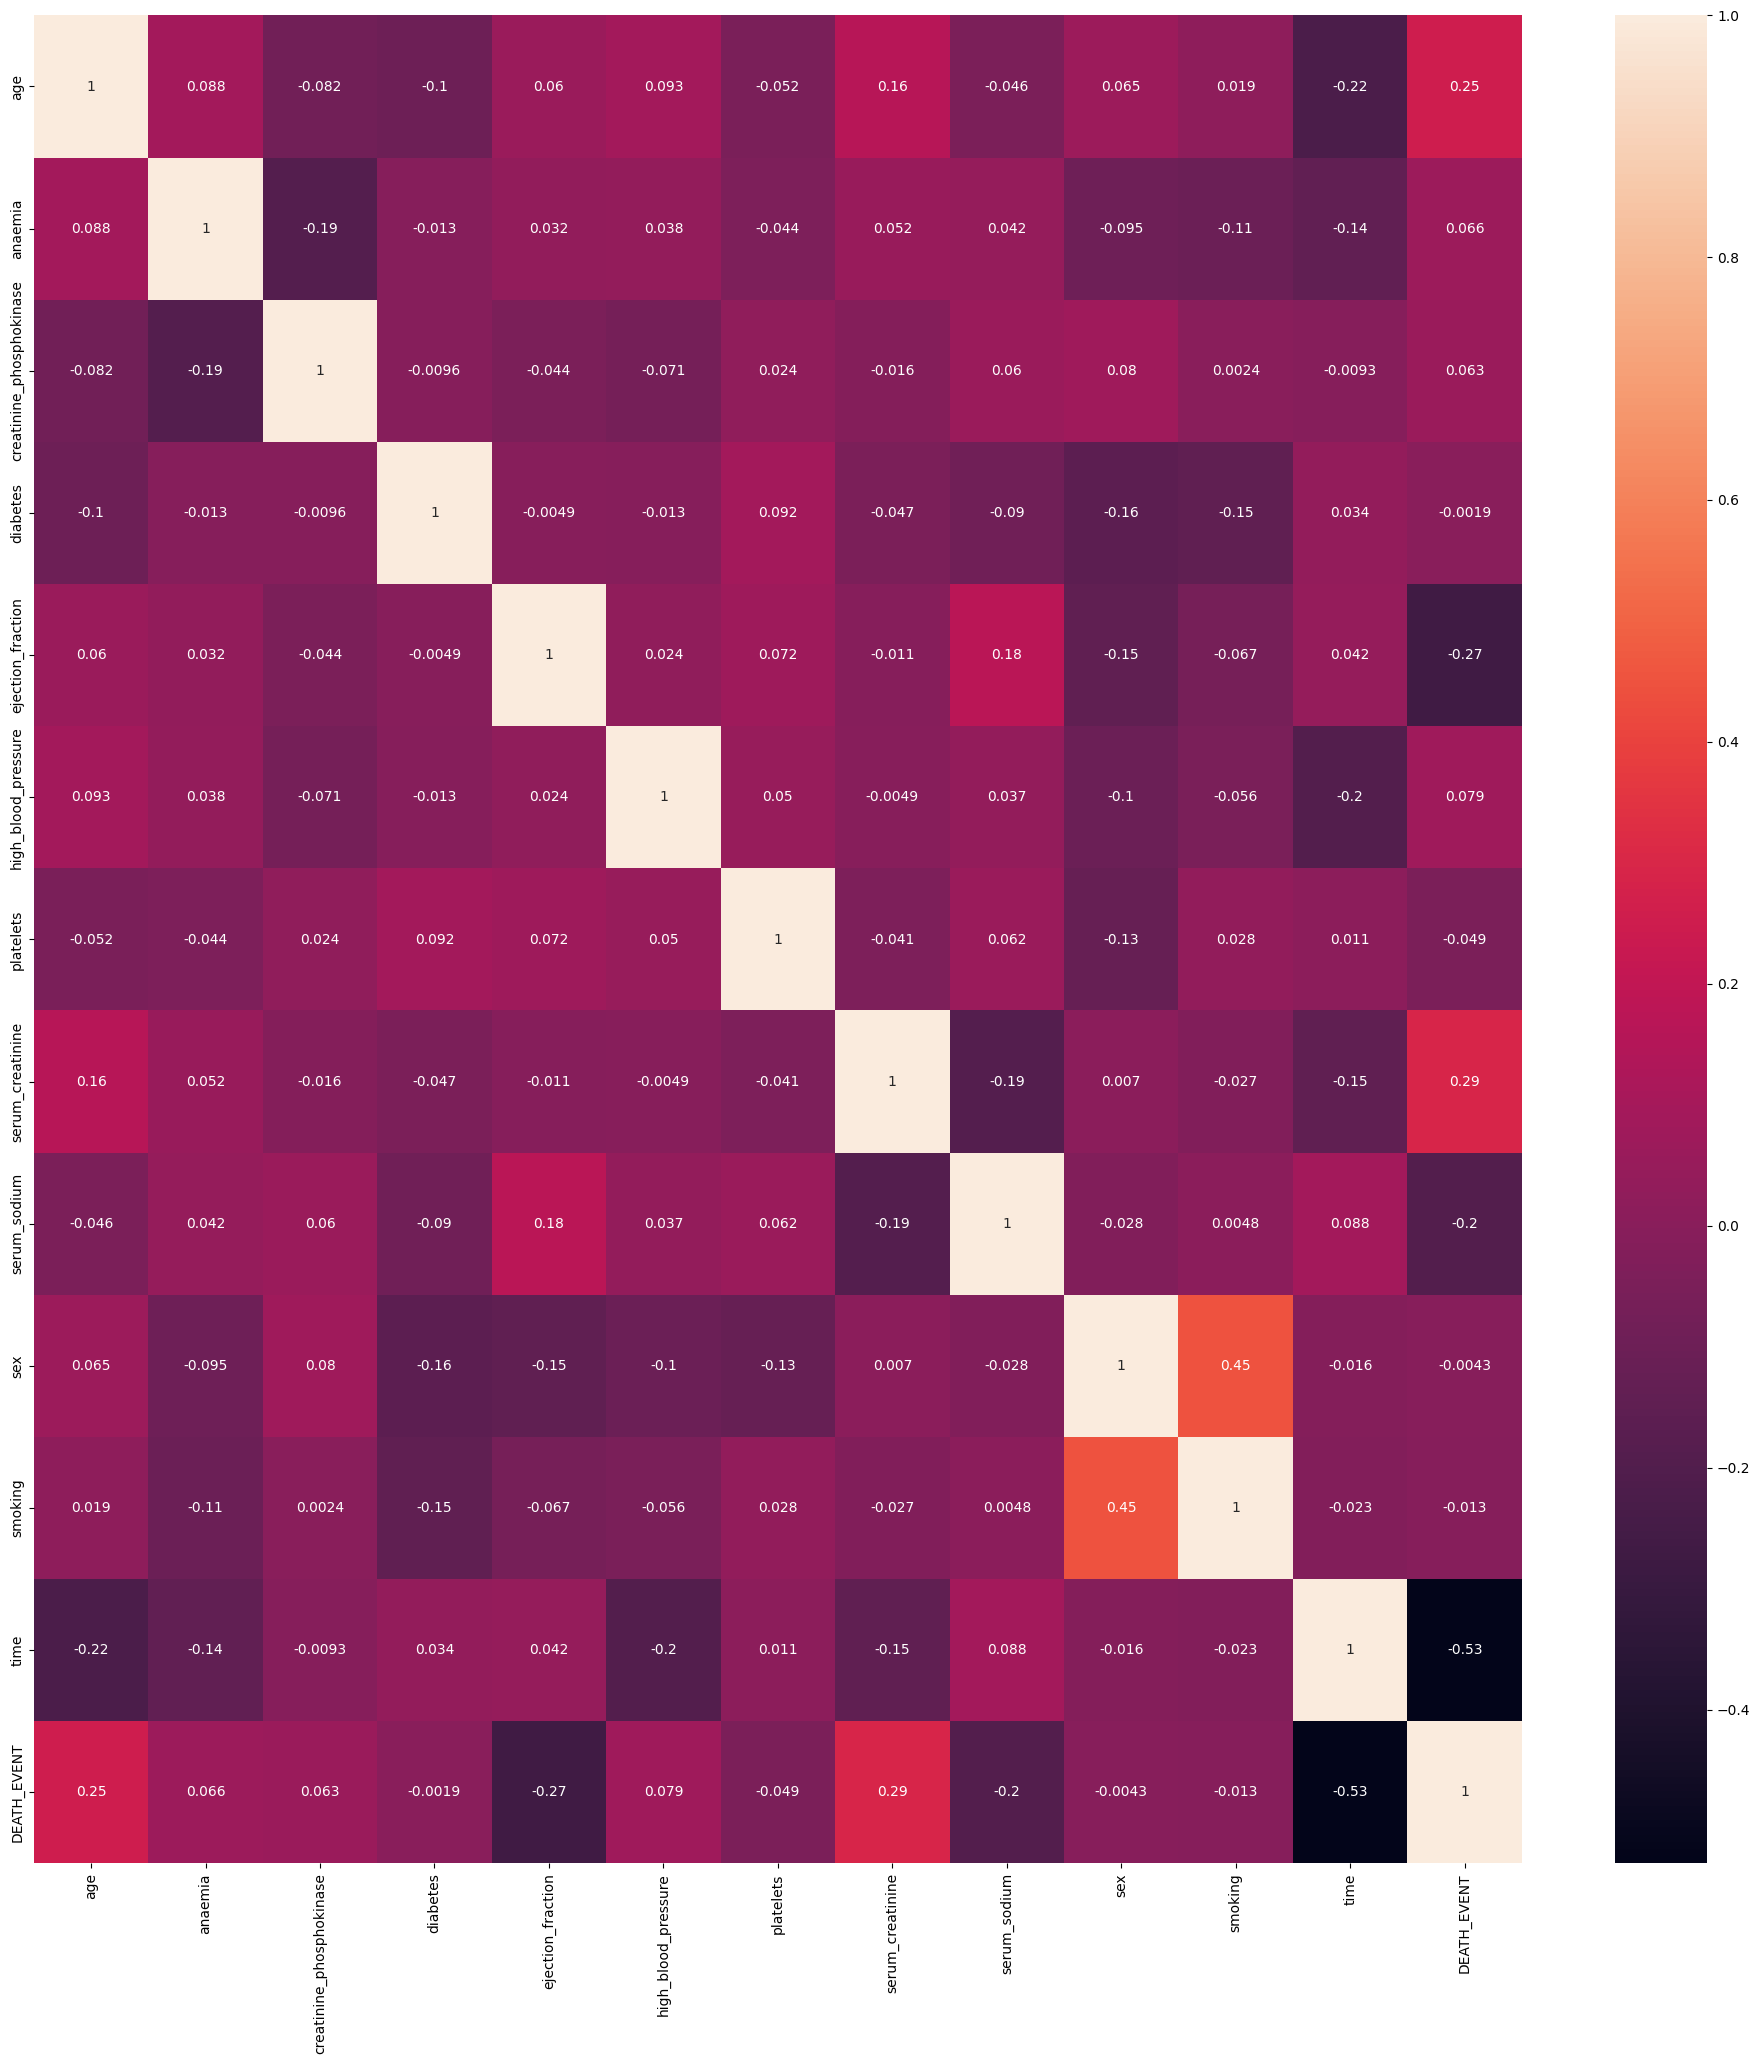

In [16]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True)

In [17]:
# preprocessing

# Dependent Variable (label)
y = df["DEATH_EVENT"]

# independent variable
x = df.drop("DEATH_EVENT", axis = 1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    stratify = y,
                                                    random_state = 1)

In [19]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# decision tree model training
model = DecisionTreeClassifier(criterion='entropy')

In [21]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [22]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        41
           1       0.47      0.47      0.47        19

    accuracy                           0.67        60
   macro avg       0.61      0.61      0.61        60
weighted avg       0.67      0.67      0.67        60



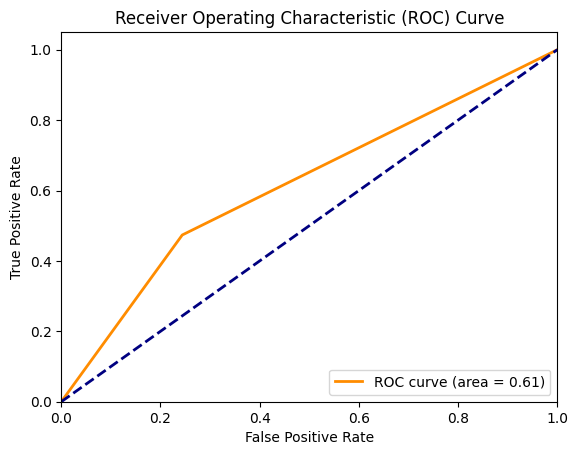

In [24]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[[31 10]
 [10  9]]


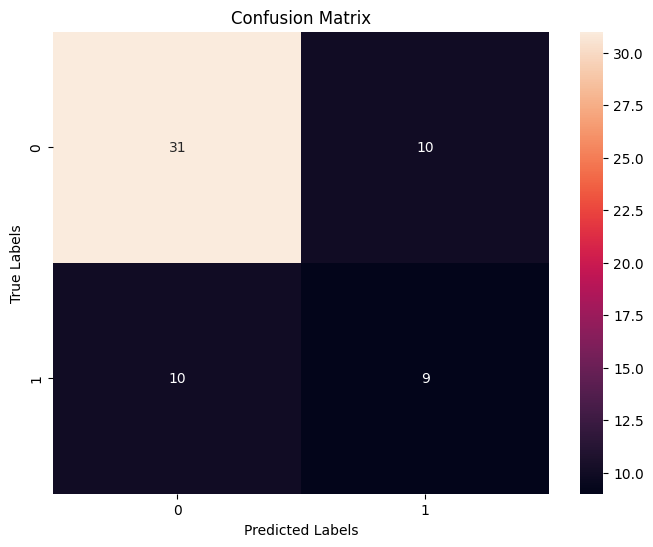

In [25]:
# Visualization Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [26]:
# unseen data
scaled_data = scaler.transform([[75.0, 0.0, 582.0, 0.0, 20.0, 1.0, 265000.0, 1.9, 130.0, 1.0, 0.0, 4.0]])
prediction = model.predict(scaled_data)
print("Predicted output:", prediction)

Predicted output: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
#unseen data

scaled_data = scaler.transform([[53.0, 0.0, 63.0, 1.0, 60.0, 0.0, 368000.0, 0.8, 135.0, 1.0, 0.0, 22.0]])
prediction = model.predict(scaled_data)
print("Predicted output:", prediction)

Predicted output: [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
